In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/xarray-data/screening_task.nc


**Task-1**

In [90]:
import xarray as xr

ds = xr.open_dataset("/kaggle/input/xarray-data/screening_task.nc")


In [91]:
import os
os.listdir("/kaggle/input")


['xarray-data']

In [92]:
import xarray as xr

ds = xr.open_dataset("/kaggle/input/xarray-data/screening_task.nc")


In [93]:
ds


<xarray.Dataset> Size: 21kB
Dimensions:    (Element: 85, Component: 30)
Coordinates:
  * Element    (Element) int32 340B 1 2 3 4 5 6 7 8 ... 78 79 80 81 82 83 84 85
  * Component  (Component) object 240B 'Mx_i' 'Mx_j' 'My_i' ... 'x' 'y' 'z'
    Loadcase   object 8B ...
Data variables:
    forces     (Element, Component) float64 20kB ...

In [94]:
ds.coords["Element"].values[:20]


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20], dtype=int32)

In [95]:
ds.coords["Component"].values


array(['Mx_i', 'Mx_j', 'My_i', 'My_j', 'Mz_i', 'Mz_j', 'Vx_i', 'Vx_j',
       'Vy_i', 'Vy_j', 'Vz_i', 'Vz_j', 'ddtheta_x', 'ddtheta_y',
       'ddtheta_z', 'ddx', 'ddy', 'ddz', 'dtheta_x', 'dtheta_y',
       'dtheta_z', 'dx', 'dy', 'dz', 'theta_x', 'theta_y', 'theta_z', 'x',
       'y', 'z'], dtype=object)

In [96]:
ds


<xarray.Dataset> Size: 21kB
Dimensions:    (Element: 85, Component: 30)
Coordinates:
  * Element    (Element) int32 340B 1 2 3 4 5 6 7 8 ... 78 79 80 81 82 83 84 85
  * Component  (Component) object 240B 'Mx_i' 'Mx_j' 'My_i' ... 'x' 'y' 'z'
    Loadcase   object 8B ...
Data variables:
    forces     (Element, Component) float64 20kB ...

In [97]:
e = 15
'Mz_i', 'Mz_j', 'Vy_i', 'Vy_j'



('Mz_i', 'Mz_j', 'Vy_i', 'Vy_j')

In [98]:
ds.forces.sel(Element=e, Component="Mz_i")


<xarray.DataArray 'forces' ()> Size: 8B
[1 values with dtype=float64]
Coordinates:
    Element    int32 4B 15
    Component  <U4 16B 'Mz_i'
    Loadcase   object 8B ...

In [99]:

Mz_i = ds.forces.sel(Element=e, Component="Mz_i").values
Mz_i



array(1.19015908e-13)

In [100]:
Mz_j = float(ds.forces.sel(Element=e, Component="Mz_j").values)
Vy_i = float(ds.forces.sel(Element=e, Component="Vy_i").values)
Vy_j = float(ds.forces.sel(Element=e, Component="Vy_j").values)

Mz_i, Mz_j, Vy_i, Vy_j


(array(1.19015908e-13),
 -6.326409811754969,
 -2.2774893123172473,
 2.2774893123172473)

In [101]:
Mz_i = float(Mz_i)
Mz_i


1.1901590823981678e-13

In [102]:
central_elements = [15, 24, 33, 42, 51, 60, 69, 78, 83]
x_vals = []
Mz_vals = []
Vy_vals = []



In [103]:
# Central girder element connectivity
members = {
    15: [3, 13],
    24: [13, 18],
    33: [18, 23],
    42: [23, 28],
    51: [28, 33],
    60: [33, 38],
    69: [38, 43],
    78: [43, 48],
    83: [48, 8]
}


In [104]:
members[15]


[3, 13]

In [105]:
nodes = {
    1:[0.0,0.0,0.0], 2:[0.0,0.0,1.2], 3:[0.0,0.0,5.175], 4:[0.0,0.0,9.15], 5:[0.0,0.0,10.35],
    6:[25.0,0.0,0.0], 7:[25.0,0.0,1.2], 8:[25.0,0.0,5.175], 9:[25.0,0.0,9.15], 10:[25.0,0.0,10.35],
    11:[2.7778,0.0,0.0], 12:[2.7778,0.0,1.2], 13:[2.7778,0.0,5.175], 14:[2.7778,0.0,9.15], 15:[2.7778,0.0,10.35],
    16:[5.5556,0.0,0.0], 17:[5.5556,0.0,1.2], 18:[5.5556,0.0,5.175], 19:[5.5556,0.0,9.15], 20:[5.5556,0.0,10.35],
    21:[8.3333,0.0,0.0], 22:[8.3333,0.0,1.2], 23:[8.3333,0.0,5.175], 24:[8.3333,0.0,9.15], 25:[8.3333,0.0,10.35],
    26:[11.1111,0.0,0.0], 27:[11.1111,0.0,1.2], 28:[11.1111,0.0,5.175], 29:[11.1111,0.0,9.15], 30:[11.1111,0.0,10.35],
    31:[13.8889,0.0,0.0], 32:[13.8889,0.0,1.2], 33:[13.8889,0.0,5.175], 34:[13.8889,0.0,9.15], 35:[13.8889,0.0,10.35],
    36:[16.6667,0.0,0.0], 37:[16.6667,0.0,1.2], 38:[16.6667,0.0,5.175], 39:[16.6667,0.0,9.15], 40:[16.6667,0.0,10.35],
    41:[19.4444,0.0,0.0], 42:[19.4444,0.0,1.2], 43:[19.4444,0.0,5.175], 44:[19.4444,0.0,9.15], 45:[19.4444,0.0,10.35],
    46:[22.2222,0.0,0.0], 47:[22.2222,0.0,1.2], 48:[22.2222,0.0,5.175], 49:[22.2222,0.0,9.15], 50:[22.2222,0.0,10.35]
}


In [106]:
nodes[3]


[0.0, 0.0, 5.175]

In [107]:
members = {
    15: [3, 13],
    24: [13, 18],
    33: [18, 23],
    42: [23, 28],
    51: [28, 33],
    60: [33, 38],
    69: [38, 43],
    78: [43, 48],
    83: [48, 8]
}
members[15]


[3, 13]

In [108]:
for e in central_elements:
    # get start and end nodes
    ni, nj = members[e]
    
    # x-coordinates from node data
    xi = nodes[ni][0]
    xj = nodes[nj][0]
    
    # extract forces from Xarray
    Mz_i = float(ds.forces.sel(Element=e, Component="Mz_i").values)
    Mz_j = float(ds.forces.sel(Element=e, Component="Mz_j").values)
    
    Vy_i = float(ds.forces.sel(Element=e, Component="Vy_i").values)
    Vy_j = float(ds.forces.sel(Element=e, Component="Vy_j").values)
    
    # append for plotting
    x_vals.extend([xi, xj])
    Mz_vals.extend([Mz_i, Mz_j])
    Vy_vals.extend([Vy_i, Vy_j])


In [109]:
len(x_vals), len(Mz_vals), len(Vy_vals)


(18, 18, 18)

In [110]:
x_vals[:5], Mz_vals[:5], Vy_vals[:5]


([0.0, 2.7778, 2.7778, 5.5556, 5.5556],
 [1.1901590823981678e-13,
  -6.326409811754969,
  6.326409811754573,
  -13.103262990249593,
  13.10326299024835],
 [-2.2774893123172473,
  2.2774893123172473,
  -2.4396476270771905,
  2.4396476270771905,
  -2.6392698807535746])

In [111]:
x_vals, Mz_vals, Vy_vals = zip(*sorted(zip(x_vals, Mz_vals, Vy_vals)))


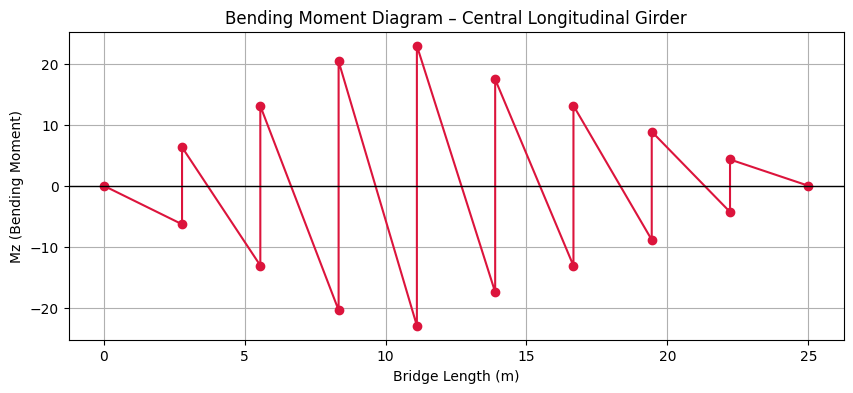

In [112]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.plot(x_vals, Mz_vals, '-o', color='crimson')
plt.axhline(0, color='black', linewidth=1)

plt.title("Bending Moment Diagram – Central Longitudinal Girder")
plt.xlabel("Bridge Length (m)")
plt.ylabel("Mz (Bending Moment)")
plt.grid(True)

plt.show()


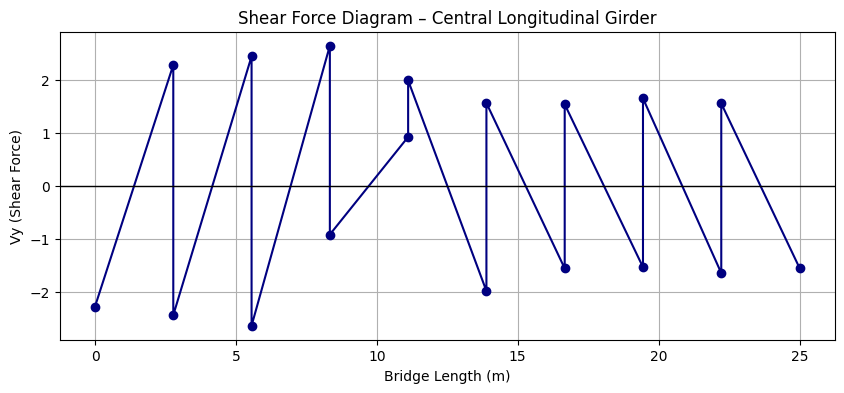

In [113]:
plt.figure(figsize=(10,4))
plt.plot(x_vals, Vy_vals, '-o', color='navy')
plt.axhline(0, color='black', linewidth=1)

plt.title("Shear Force Diagram – Central Longitudinal Girder")
plt.xlabel("Bridge Length (m)")
plt.ylabel("Vy (Shear Force)")
plt.grid(True)

plt.show()



Task - 2

**Task-2**

In [20]:
import xarray as xr

ds = xr.open_dataset("/kaggle/input/xarray-data/screening_task.nc")


In [13]:
nodes = {
    1:[0.0,0.0,0.0], 2:[0.0,0.0,1.2], 3:[0.0,0.0,5.175], 4:[0.0,0.0,9.15], 5:[0.0,0.0,10.35],
    6:[25.0,0.0,0.0], 7:[25.0,0.0,1.2], 8:[25.0,0.0,5.175], 9:[25.0,0.0,9.15], 10:[25.0,0.0,10.35],
    11:[2.7778,0.0,0.0], 12:[2.7778,0.0,1.2], 13:[2.7778,0.0,5.175], 14:[2.7778,0.0,9.15], 15:[2.7778,0.0,10.35],
    16:[5.5556,0.0,0.0], 17:[5.5556,0.0,1.2], 18:[5.5556,0.0,5.175], 19:[5.5556,0.0,9.15], 20:[5.5556,0.0,10.35],
    21:[8.3333,0.0,0.0], 22:[8.3333,0.0,1.2], 23:[8.3333,0.0,5.175], 24:[8.3333,0.0,9.15], 25:[8.3333,0.0,10.35],
    26:[11.1111,0.0,0.0], 27:[11.1111,0.0,1.2], 28:[11.1111,0.0,5.175], 29:[11.1111,0.0,9.15], 30:[11.1111,0.0,10.35],
    31:[13.8889,0.0,0.0], 32:[13.8889,0.0,1.2], 33:[13.8889,0.0,5.175], 34:[13.8889,0.0,9.15], 35:[13.8889,0.0,10.35],
    36:[16.6667,0.0,0.0], 37:[16.6667,0.0,1.2], 38:[16.6667,0.0,5.175], 39:[16.6667,0.0,9.15], 40:[16.6667,0.0,10.35],
    41:[19.4444,0.0,0.0], 42:[19.4444,0.0,1.2], 43:[19.4444,0.0,5.175], 44:[19.4444,0.0,9.15], 45:[19.4444,0.0,10.35],
    46:[22.2222,0.0,0.0], 47:[22.2222,0.0,1.2], 48:[22.2222,0.0,5.175], 49:[22.2222,0.0,9.15], 50:[22.2222,0.0,10.35]
}


In [3]:
girders = {
    1: [13, 22, 31, 40, 49, 58, 67, 76, 81],
    2: [14, 23, 32, 41, 50, 59, 68, 77, 82],
    3: [15, 24, 33, 42, 51, 60, 69, 78, 83],
    4: [16, 25, 34, 43, 52, 61, 70, 79, 84],
    5: [17, 26, 35, 44, 53, 62, 71, 80, 85]
}


In [5]:
members = {
    13:[1,11], 22:[11,16], 31:[16,21], 40:[21,26], 49:[26,31], 58:[31,36], 67:[36,41], 76:[41,46], 81:[46,6],
    14:[2,12], 23:[12,17], 32:[17,22], 41:[22,27], 50:[27,32], 59:[32,37], 68:[37,42], 77:[42,47], 82:[47,7],
    15:[3,13], 24:[13,18], 33:[18,23], 42:[23,28], 51:[28,33], 60:[33,38], 69:[38,43], 78:[43,48], 83:[48,8],
    16:[4,14], 25:[14,19], 34:[19,24], 43:[24,29], 52:[29,34], 61:[34,39], 70:[39,44], 79:[44,49], 84:[49,9],
    17:[5,15], 26:[15,20], 35:[20,25], 44:[25,30], 53:[30,35], 62:[35,40], 71:[40,45], 80:[45,50], 85:[50,10]
}


In [8]:
import plotly.graph_objects as go


In [9]:
def plot_3d_diagram(component_name, title):
    fig = go.Figure()

    for gid, element_list in girders.items():
        X, Y, Z = [], [], []

        for e in element_list:
            ni, nj = members[e]

            xi, yi, zi = nodes[ni]
            xj, yj, zj = nodes[nj]

            val_i = float(ds.forces.sel(Element=e, Component=f"{component_name}_i").values)
            val_j = float(ds.forces.sel(Element=e, Component=f"{component_name}_j").values)

            X.extend([xi, xj])
            Z.extend([zi, zj])
            Y.extend([val_i, val_j])

        fig.add_trace(go.Scatter3d(
            x=X,
            y=Y,
            z=Z,
            mode="lines",
            name=f"Girder {gid}",
            line=dict(width=6)
        ))

    fig.update_layout(
        title=title,
        scene=dict(
            xaxis_title="Bridge Length (X)",
            yaxis_title=f"{component_name}",
            zaxis_title="Bridge Width (Z)"
        ),
        height=600
    )

    fig.show()


In [16]:
nodes[3]
members[15]


[3, 13]

In [22]:
plot_3d_diagram("Mz", "3D Bending Moment Diagram (All Girders)")
